In [1]:
import sys
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

<IPython.core.display.Javascript object>

Read all files

In [16]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("caliper_files/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 247/247 [00:02<00:00, 117.96it/s]


View Calltree

In [3]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

0.001 MPI_Comm_dup
0.000 MPI_Finalize
0.000 MPI_Finalized
0.000 MPI_Initialized
0.017 main
├─ 0.012 MPI_Barrier
├─ 0.004 comm
│  ├─ 0.000 comm_large
│  │  ├─ 0.000 MPI_Recv
│  │  └─ 0.000 MPI_Send
│  └─ 0.004 comm_small
│     └─ 0.004 MPI_Scatter
├─ 0.000 comp
│  ├─ 0.000 comp_large
│  └─ 0.000 comp_small
├─ 0.000 correctness_check
│  ├─ 0.000 MPI_Allreduce
│  ├─ 0.000 MPI_Recv
│  └─ 0.000 MPI_Send
└─ 0.000 data_init_runtime

Legend (Metric: Avg time/rank Min: 0.00 Max: 0.02 indices: {'profile': 15057590})
█ 0.02 - 0.02
█ 0.01 - 0.02
█ 0.01 - 0.01
█ 0.01 - 0.01
█ 0.00 - 0.01
█ 0.00 - 0.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Group Performance data by `matrix_size` in the Thicket metadata table.

In [17]:
tk.metadata_column_to_perfdata("num_procs")

tk.metadata_column_to_perfdata("input_type")

tk.metadata_column_to_perfdata("input_size")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "input_size", "input_type", "num_procs" ]).sort_index()

tk.dataframe.head()

profile  \
node                                         input_size input_type num_procs               
{'name': 'MPI_Comm_dup', 'type': 'function'} 65536      perturbed  2          3739233504   
                                                                   4           240462487   
                                                                   8          1462294724   
                                                                   16         3427913550   
                                                                   32         1372484201   

                                                                               nid  \
node                                         input_size input_type num_procs         
{'name': 'MPI_Comm_dup', 'type': 'function'} 65536      perturbed  2          24.0   
                                                                   4          24.0   
                                                                   8          24.0   
                                                                   16         24.0   
                                                                   32         24.0   

                                                                               spot.channel  \
node                                         input_size input_type num_procs                  
{'name': 'MPI_Comm_dup', 'type': 'function'} 65536      perturbed  2          regionprofile   
                                                                   4          regionprofile   
                                                                   8          regionprofile   
                                                                   16         regionprofile   
                                                                   32         regionprofile   

                                                                              Min time/rank  \
node                                         input_size input_type num_procs                  
{'name': 'MPI_Comm_dup', 'type': 'function'} 65536      perturbed  2               0.000104   
                                                                   4               0.000520   
                                                                   8               0.000122   
                                                                   16              0.000567   
                                                                   32              0.000254   

                                                                              Max time/rank  \
node                                         input_size input_type num_procs                  
{'name': 'MPI_Comm_dup', 'type': 'function'} 65536      perturbed  2               0.000104   
                                                                   4               0.000534   
                                                                   8               0.000160   
                                                                   16              0.000615   
                                                                   32              0.000426   

                                                                              Avg time/rank  \
node                                         input_size input_type num_procs                  
{'name': 'MPI_Comm_dup', 'type': 'function'} 65536      perturbed  2               0.000104   
                                                                   4               0.000527   
                                                                   8               0.000142   
                                                                   16              0.000590   
                                                                   32              0.000324   

                                                                              Total time  \
node                                         input_size input_type num_procs 

In [5]:
# Define common variables
processes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
input_sizes = [16, 18, 20, 22, 24, 26, 28]
input_types = ["sorted", "random", "perturbed", "reverse_sorted"]

In [6]:
# Change font size for all plots
plt.rcParams.update({"font.size": 10})

saving at:  main_16.png


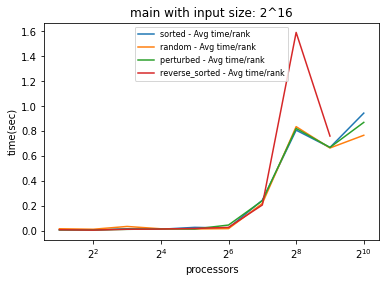

saving at:  main_18.png


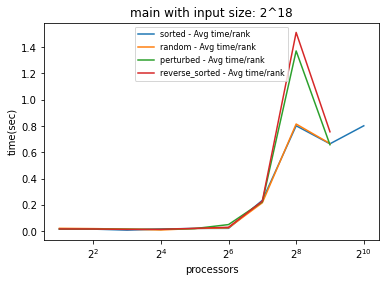

saving at:  main_20.png


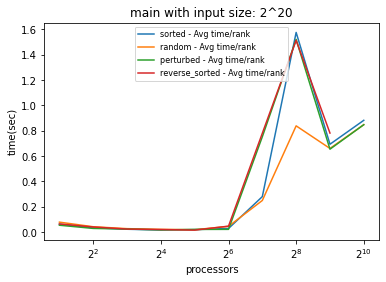

saving at:  main_22.png


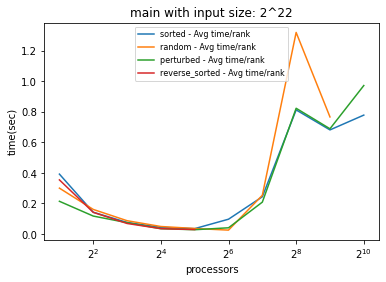

saving at:  main_24.png


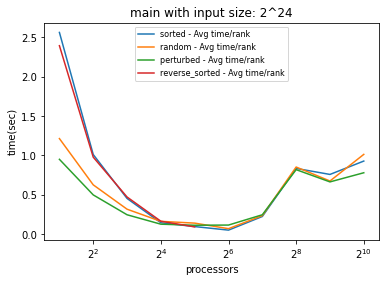

saving at:  main_26.png


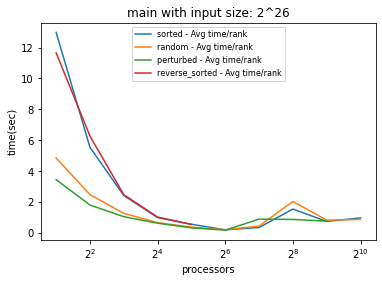

saving at:  main_28.png


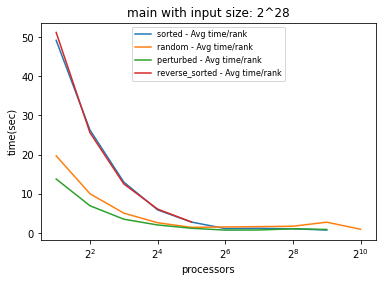

saving at:  comm_16.png


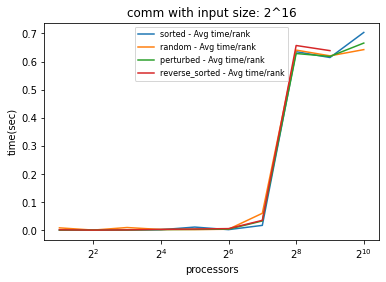

saving at:  comm_18.png


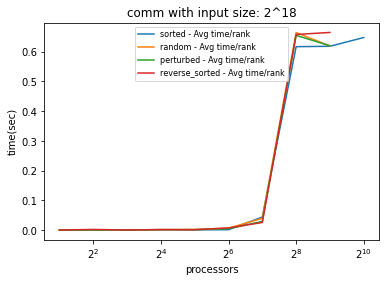

saving at:  comm_20.png


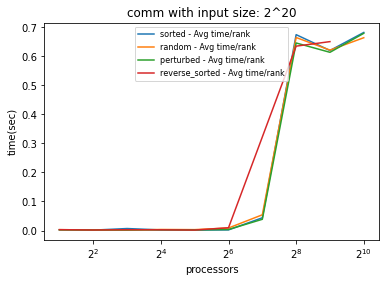

saving at:  comm_22.png


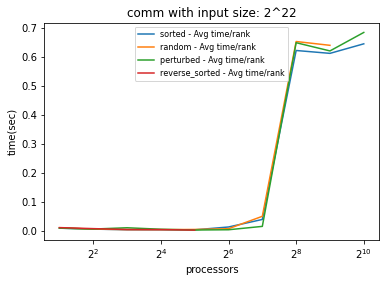

saving at:  comm_24.png


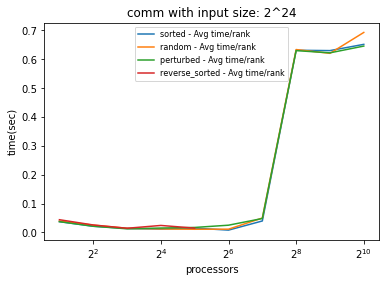

saving at:  comm_26.png


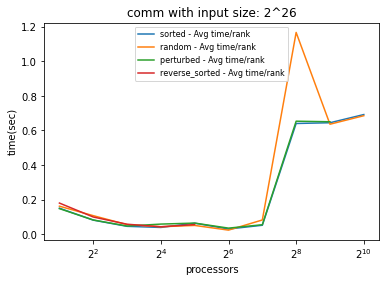

saving at:  comm_28.png


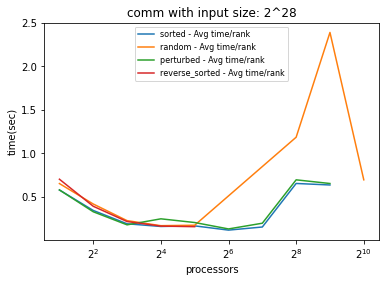

saving at:  comm_large_16.png


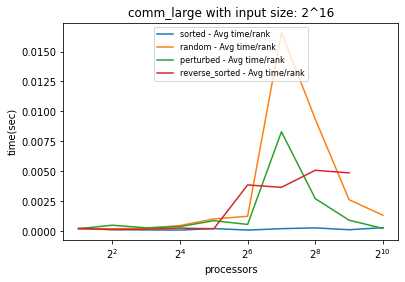

saving at:  comm_large_18.png


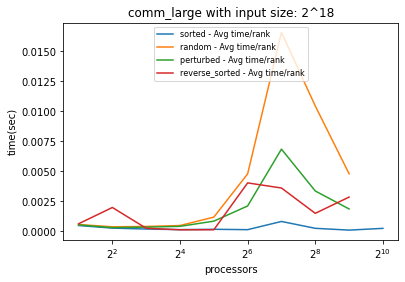

saving at:  comm_large_20.png


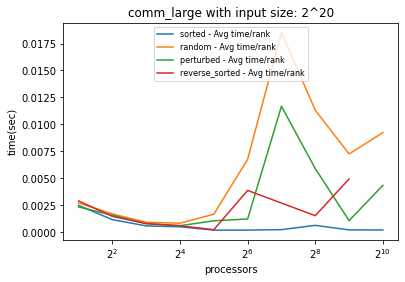

saving at:  comm_large_22.png


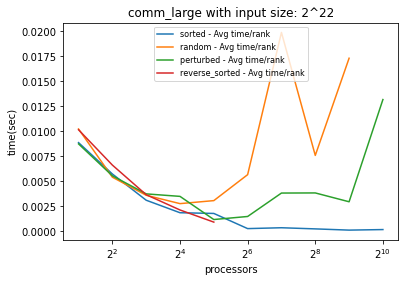

saving at:  comm_large_24.png


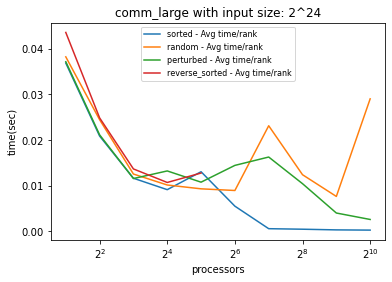

saving at:  comm_large_26.png


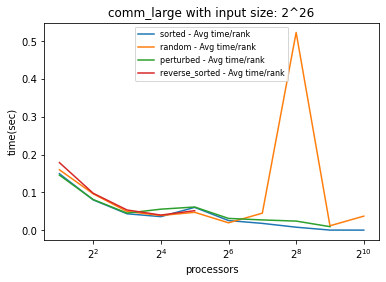

saving at:  comm_large_28.png


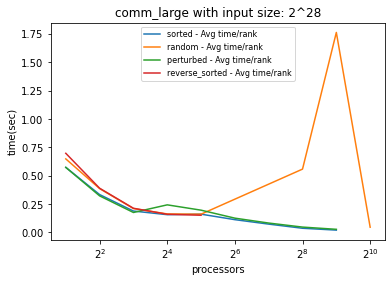

saving at:  comm_small_16.png


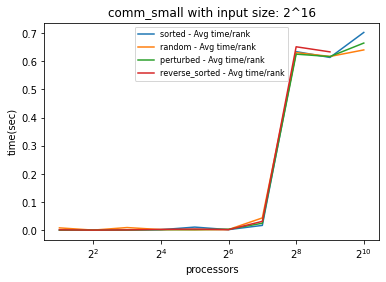

saving at:  comm_small_18.png


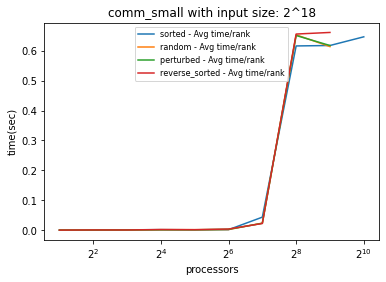

saving at:  comm_small_20.png


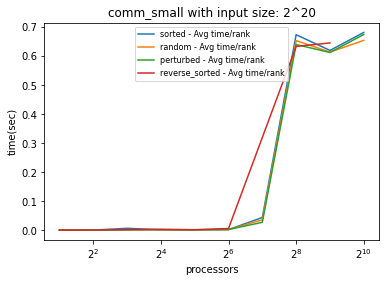

saving at:  comm_small_22.png


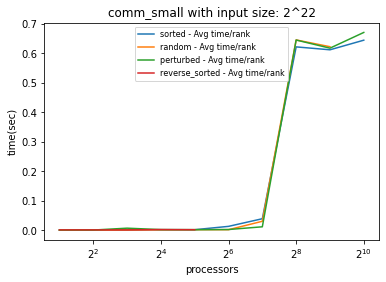

saving at:  comm_small_24.png


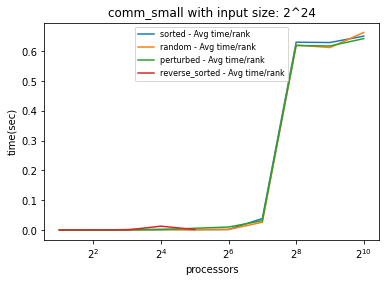

saving at:  comm_small_26.png


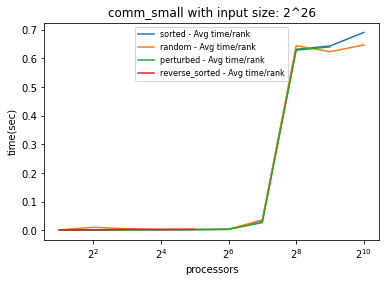

saving at:  comm_small_28.png


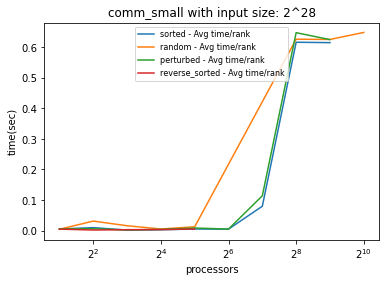

saving at:  comp_16.png


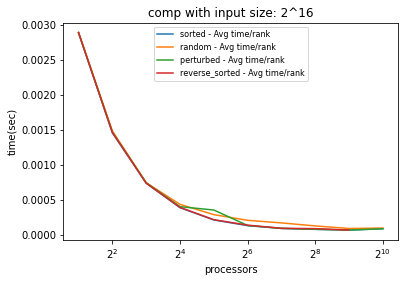

saving at:  comp_18.png


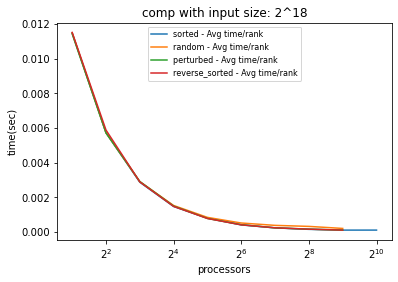

saving at:  comp_20.png


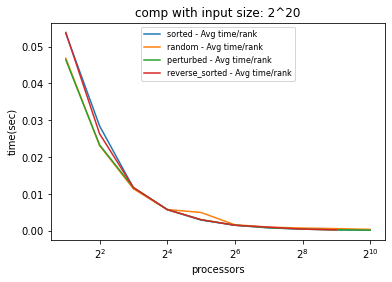

saving at:  comp_22.png


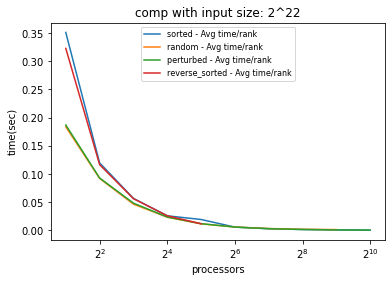

saving at:  comp_24.png


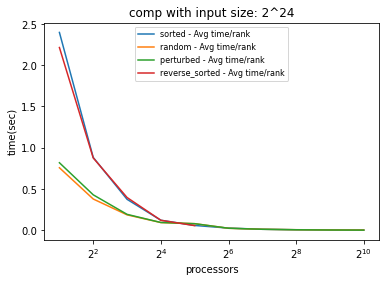

saving at:  comp_26.png


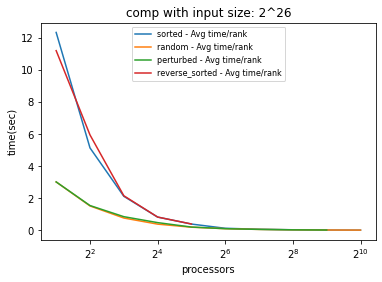

saving at:  comp_28.png


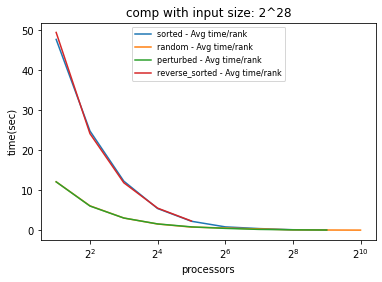

saving at:  comp_large_16.png


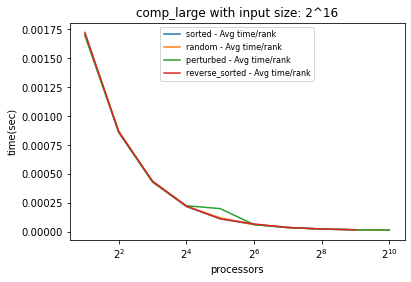

saving at:  comp_large_18.png


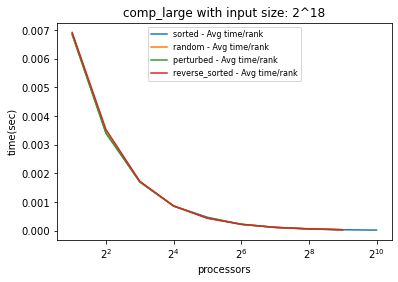

saving at:  comp_large_20.png


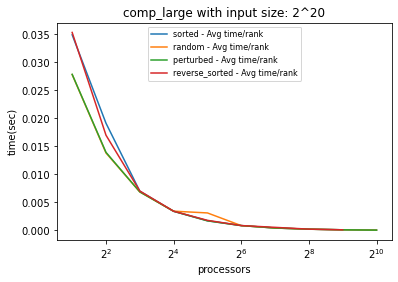

saving at:  comp_large_22.png


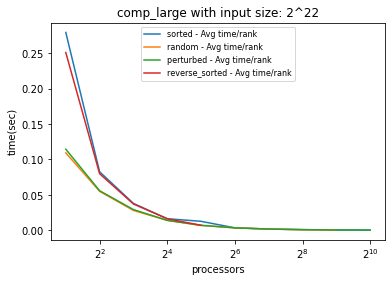

saving at:  comp_large_24.png


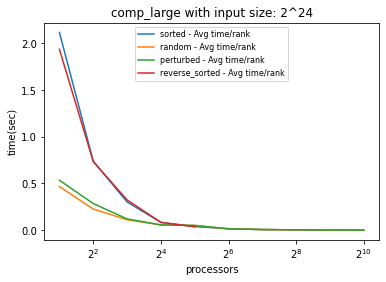

saving at:  comp_large_26.png


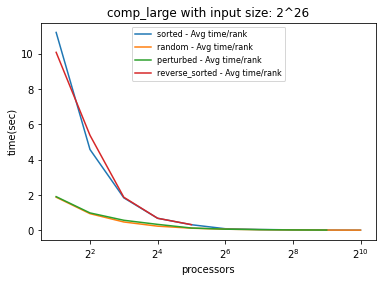

saving at:  comp_large_28.png


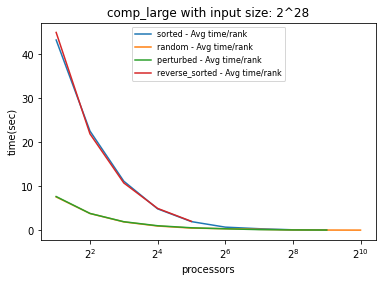

saving at:  comp_small_16.png


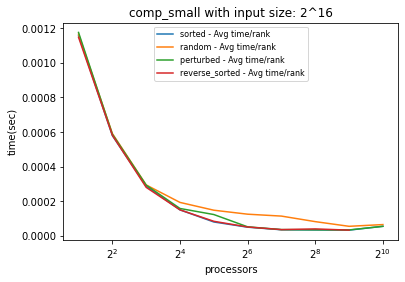

saving at:  comp_small_18.png


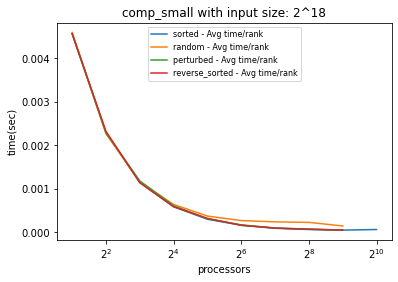

saving at:  comp_small_20.png


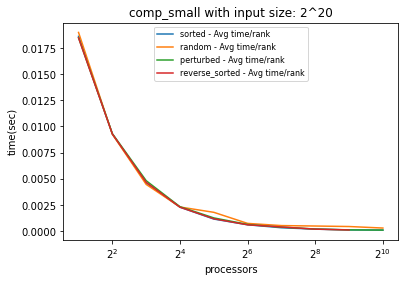

saving at:  comp_small_22.png


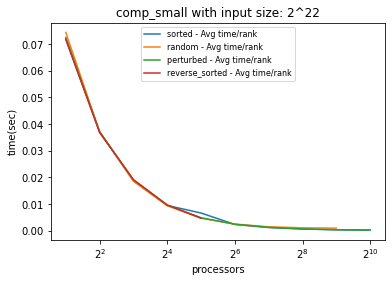

saving at:  comp_small_24.png


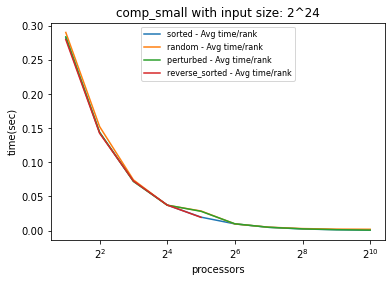

saving at:  comp_small_26.png


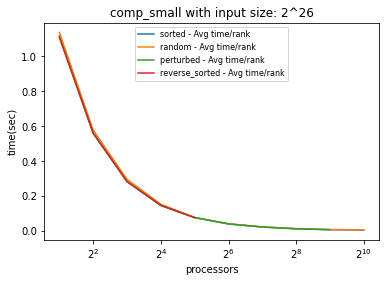

saving at:  comp_small_28.png


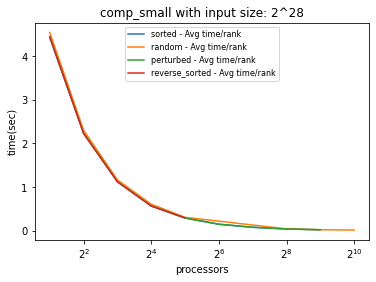

saving at:  correctness_check_16.png


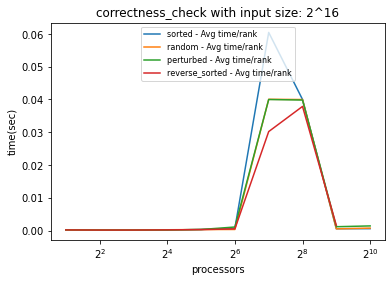

saving at:  correctness_check_18.png


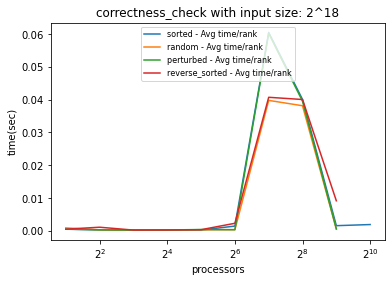

saving at:  correctness_check_20.png


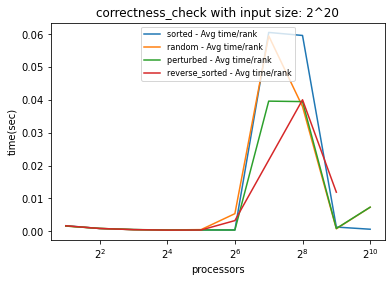

saving at:  correctness_check_22.png


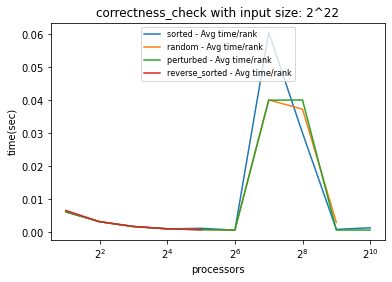

saving at:  correctness_check_24.png


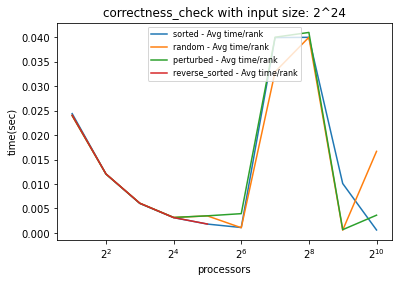

saving at:  correctness_check_26.png


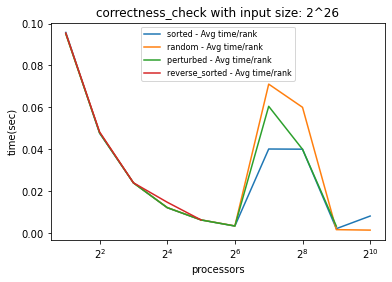

saving at:  correctness_check_28.png


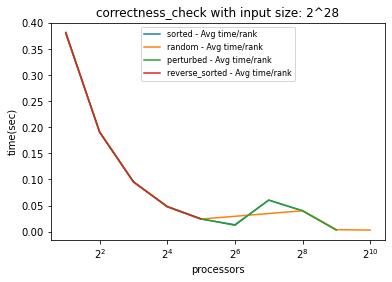

saving at:  data_init_runtime_16.png


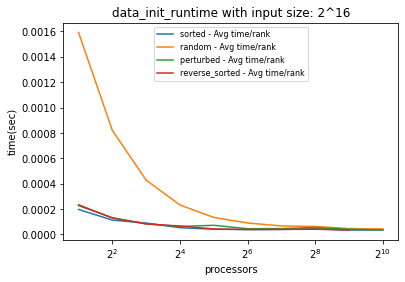

saving at:  data_init_runtime_18.png


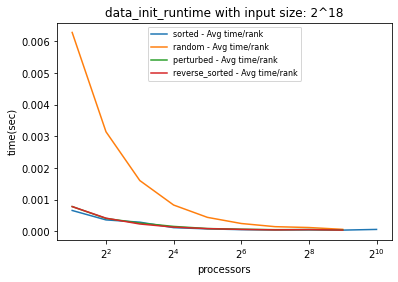

saving at:  data_init_runtime_20.png


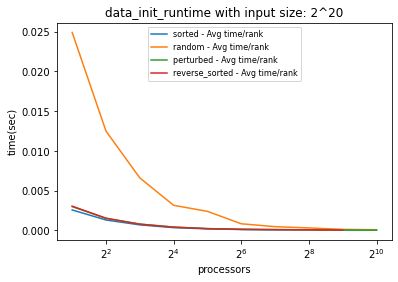

saving at:  data_init_runtime_22.png


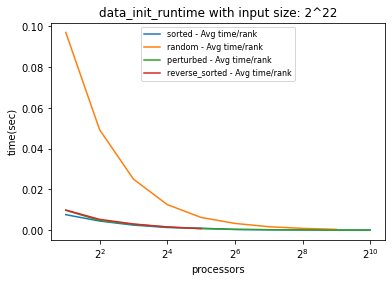

saving at:  data_init_runtime_24.png


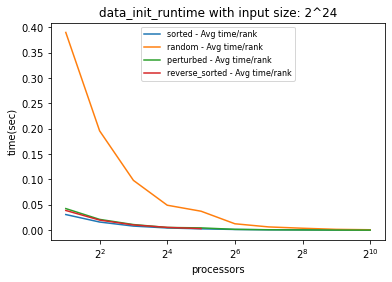

saving at:  data_init_runtime_26.png


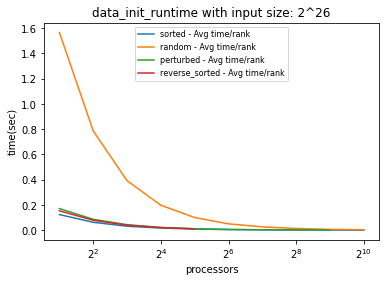

saving at:  data_init_runtime_28.png


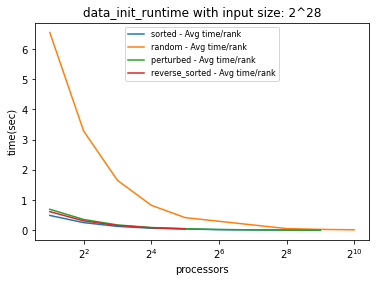

In [19]:
cont = True
for node in tk.graph.traverse():
    if("MPI" in node.frame["name"]):
        continue
    if( node.frame["name"] == "main"):
        cont = False
    if(cont):
        continue
    
    df = tk.dataframe.loc[node, ["Avg time/rank"]]
    #print(node.frame["name"])
    for mat_size in input_sizes:
        #print(df.head())
        #print(df.loc[2**mat_size,"sorted"])
        #print("sorted",df.sorted)
        #print(df.loc[2**mat_size,["Min time/rank","Max time/rank","Avg time/rank"]])
        for in_type in input_types:
            plt.plot(df.loc[2**mat_size,in_type])
            plt.ylabel("time(sec)")
            plt.xlabel("processors")
            plt.title(node.frame["name"] + " with input size: 2^" + str(mat_size))
        
        plt.legend([input_types[0] + " - Avg time/rank",
                    input_types[1] + " - Avg time/rank",
                    input_types[2] + " - Avg time/rank",
                    input_types[3] + " - Avg time/rank"],
                    loc = "upper center",
                    fontsize = 8) 
        plt.xscale('log', base = 2)
        print("saving at: ",node.frame["name"] + "_" + str(mat_size)+".png")
        plt.savefig("graphs/"+node.frame["name"] + "_" + str(mat_size)+".png")
        plt.show()

saving at: multi_16.png


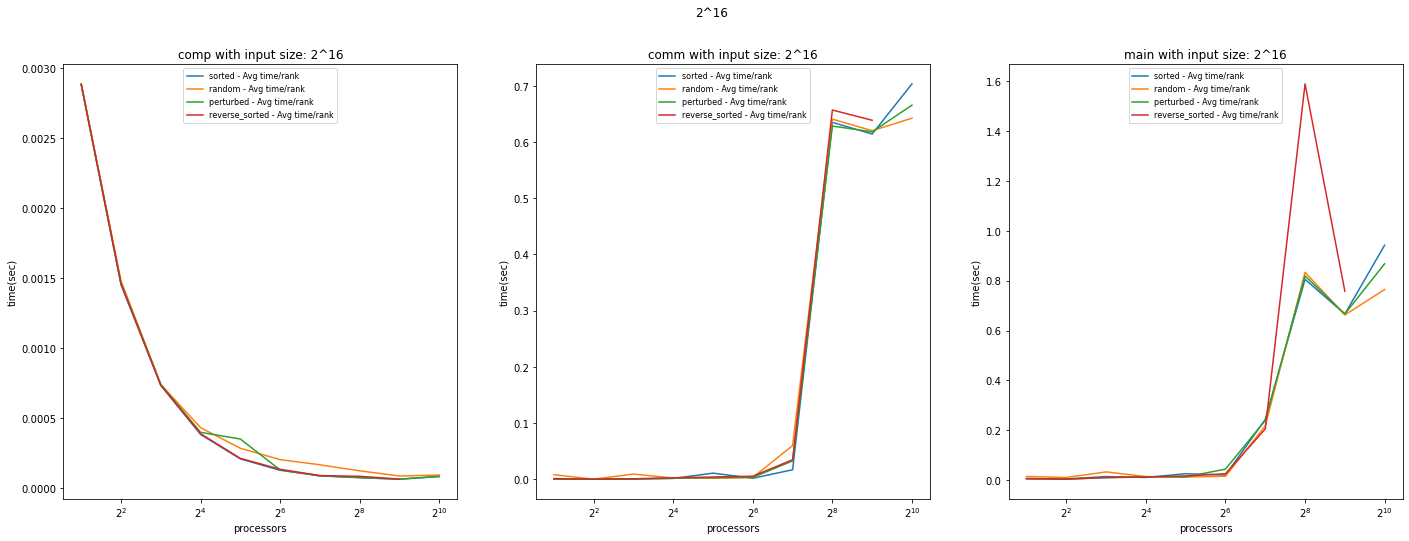

saving at: multi_18.png


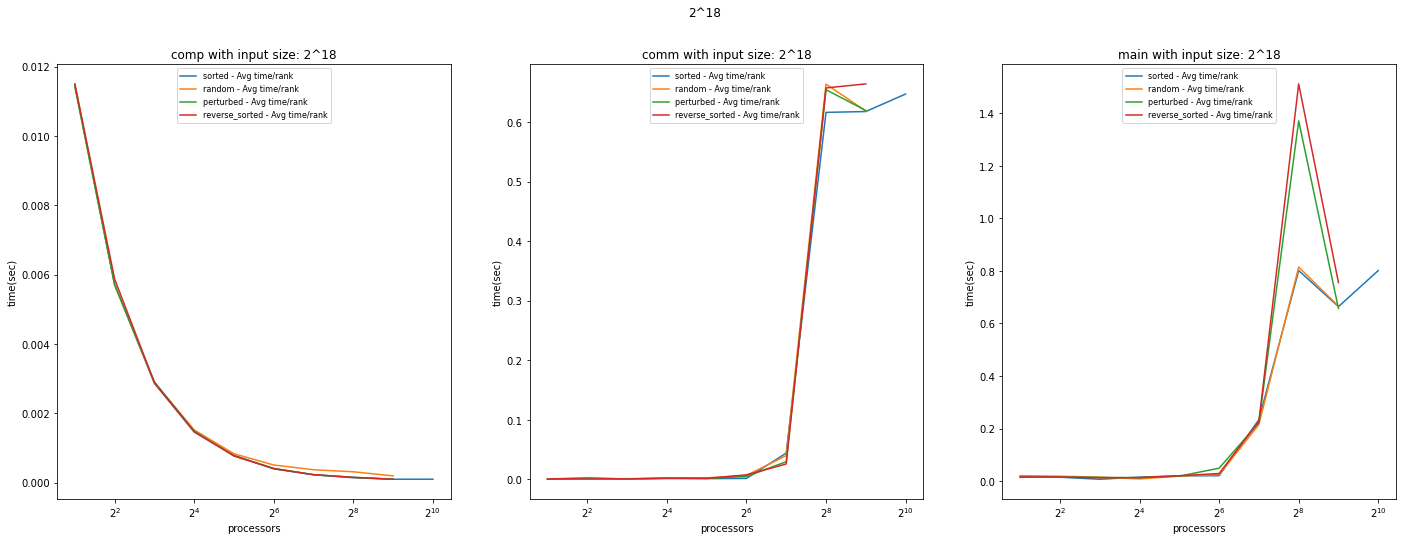

saving at: multi_20.png


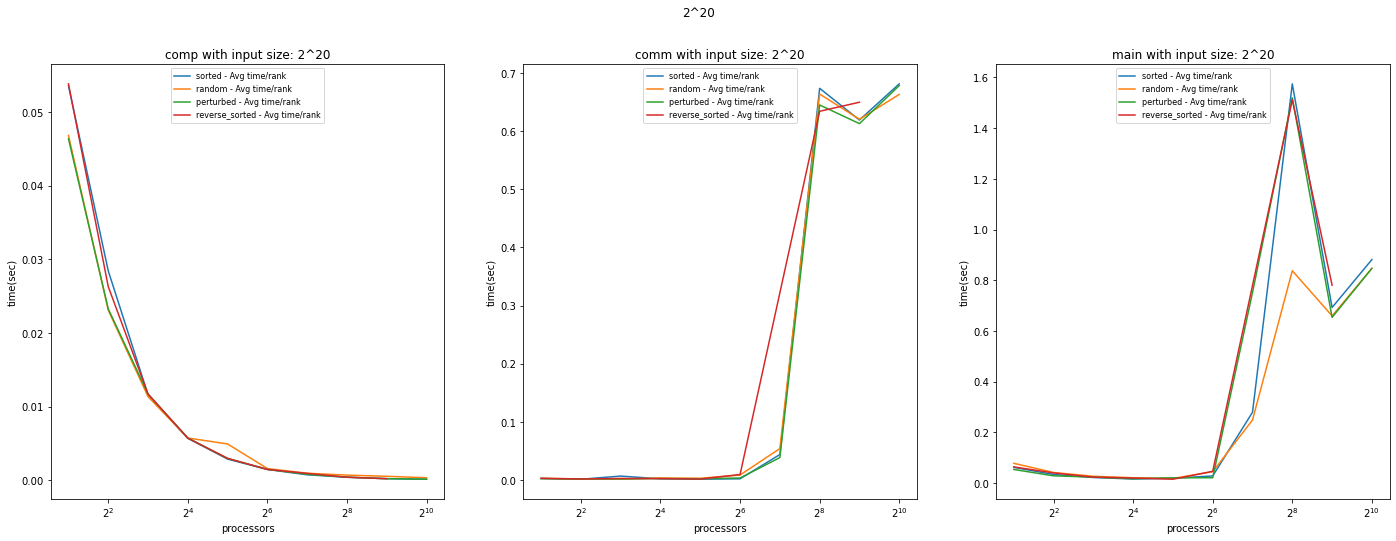

saving at: multi_22.png


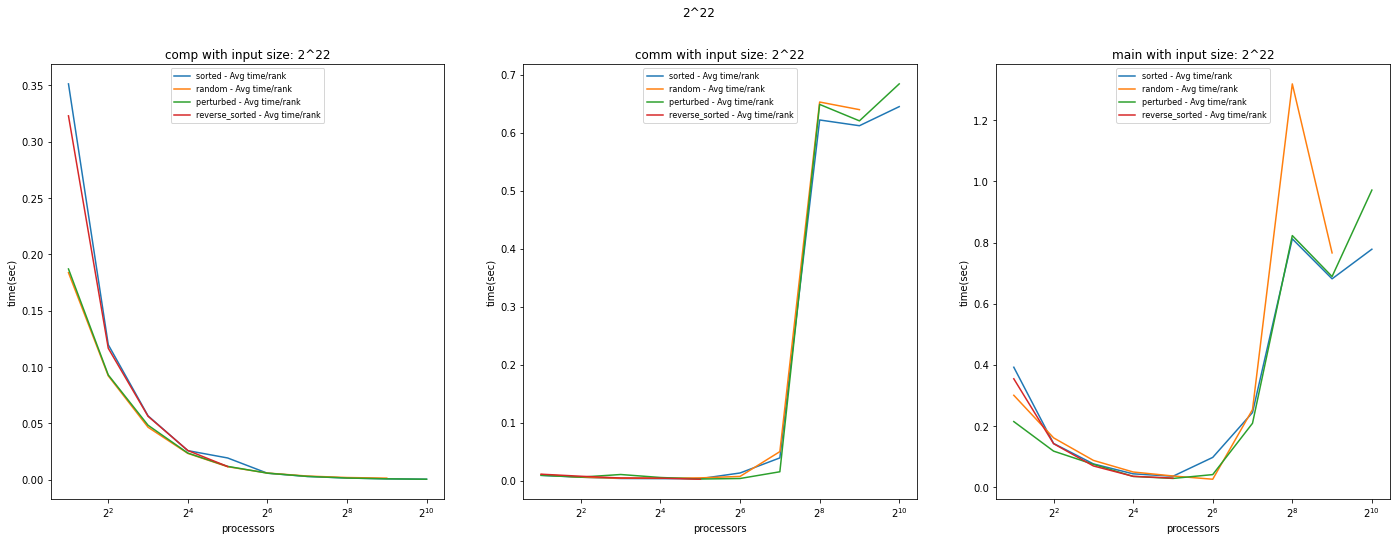

saving at: multi_24.png


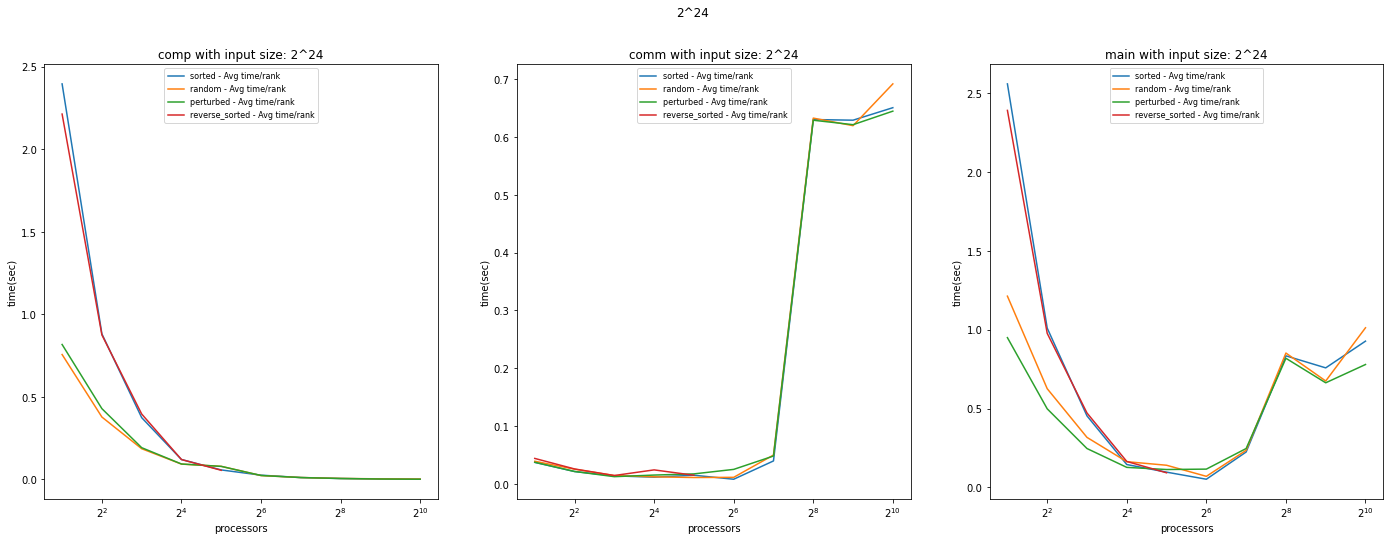

saving at: multi_26.png


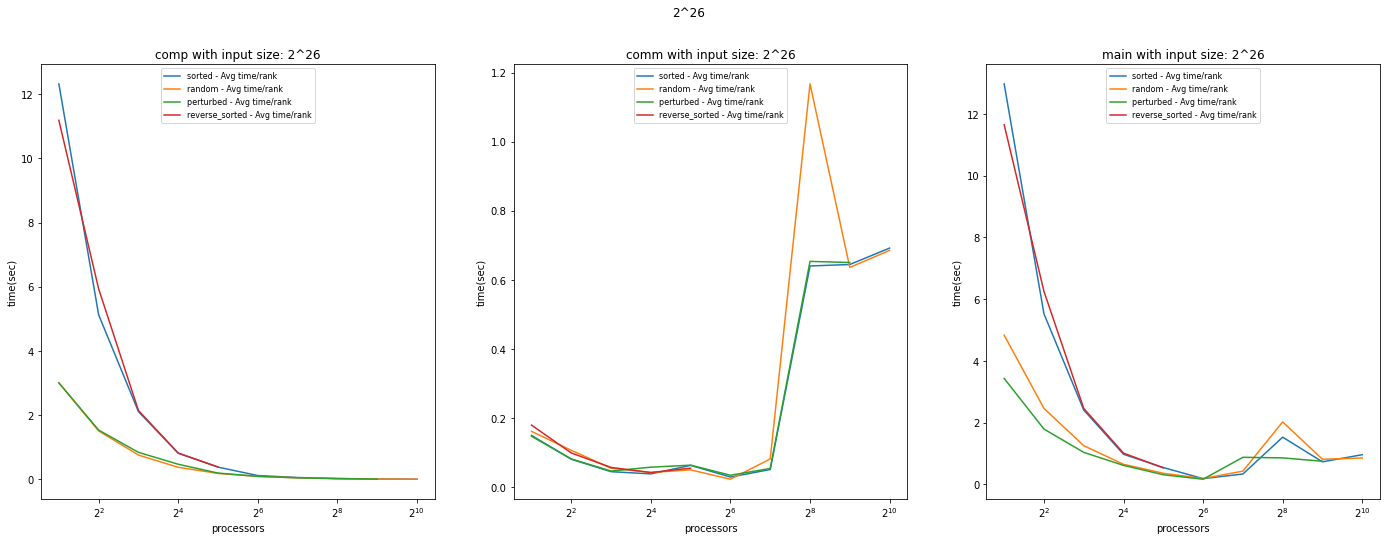

saving at: multi_28.png


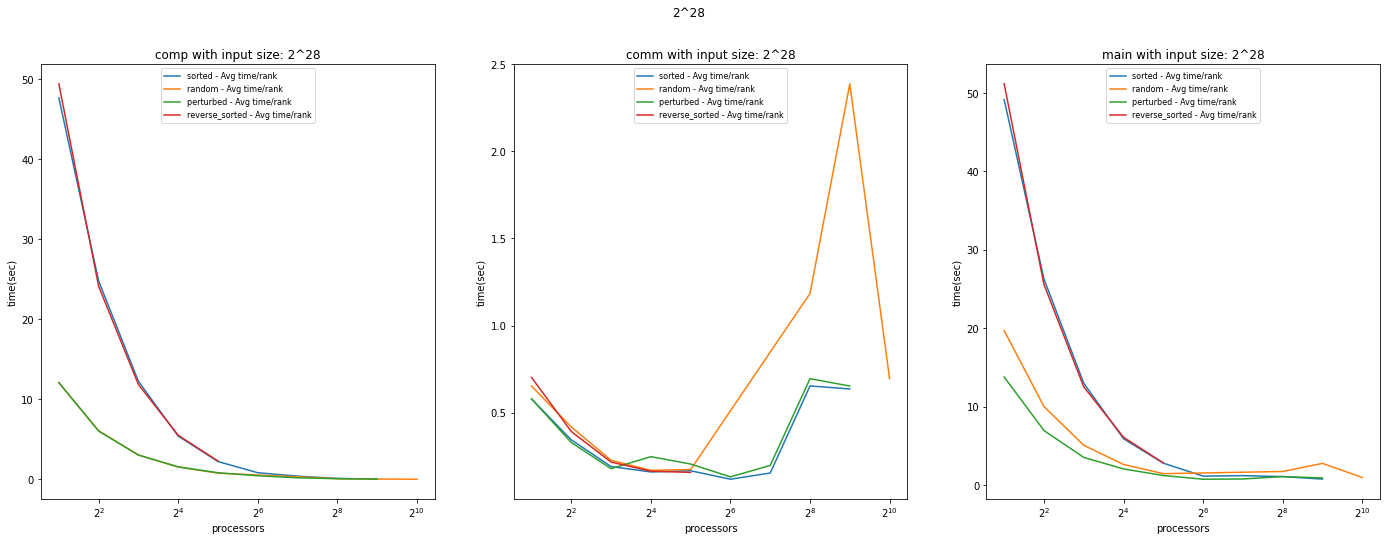

In [27]:
cont = True

#print(node.frame["name"])
for mat_size in input_sizes:
    
    fig, ax = plt.subplots(1,3,)
    fig.set_figheight(8)
    fig.set_figwidth(24)
    for node in tk.graph.traverse():
        if(node.frame["name"] not in ["main","comp","comm"]):
            continue

        df = tk.dataframe.loc[node, ["Avg time/rank"]]
        
        ax_index = ["comp","comm","main"].index(node.frame["name"])
        for in_type in input_types:
            ax[ax_index].plot(df.loc[2**mat_size,in_type])
            ax[ax_index].set_ylabel("time(sec)")
            ax[ax_index].set_xlabel("processors")
            ax[ax_index].set_title(node.frame["name"] + " with input size: 2^" + str(mat_size))
        
        ax[ax_index].legend([input_types[0] + " - Avg time/rank",
                             input_types[1] + " - Avg time/rank",
                             input_types[2] + " - Avg time/rank",
                             input_types[3] + " - Avg time/rank"],
                             loc = "upper center",
                             fontsize = 8) 
        ax[ax_index].set_xscale('log', base = 2)
    fig.suptitle(f'2^{mat_size}')
    print("saving at: multi_" + str(mat_size)+".png")
    fig.savefig("graphs/multi_" + str(mat_size)+".png")
    plt.show()

2
                                 Avg time/rank  speedup
input_size input_type num_procs                        
65536      perturbed  2               0.005825      0.0
                      4               0.004893      0.0
                      8               0.010128      0.0
                      16              0.013592      0.0
                      32              0.012956      0.0
Test:
           Avg time/rank   speedup
num_procs                         
2               0.014831  2.000000
4               0.010869  2.729046
8               0.033307  0.890564
16              0.014552  2.038345
32              0.013097  2.264793
64              0.015818  1.875205
128             0.217626  0.136298
256             0.833666  0.035580
512             0.662639  0.044763
1024            0.764557  0.038796
Test:
           Avg time/rank   speedup
num_procs                         
2               0.020604  2.000000
4               0.018303  2.251434
8               0.014799  2.784512

<ipython-input-10-18c53fe3a5ee>:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


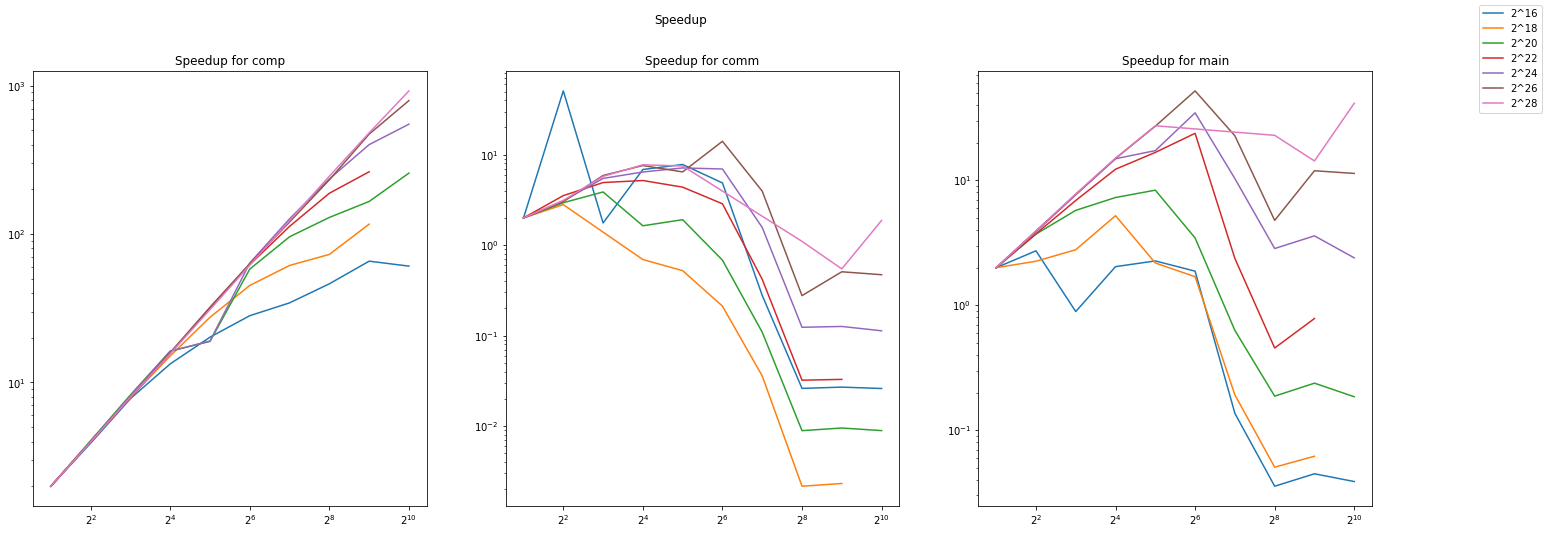

In [10]:
cont = True

fig, ax = plt.subplots(1,3)
fig.set_figheight(8)
fig.set_figwidth(24)
for node in tk.graph.traverse():
    if(node.frame["name"] not in ["comp","comm","main"]):
        continue
    
    ind = ["comp","comm","main"].index(node.frame["name"])
    print(ind)
    
    df = tk.dataframe.loc[node, ["Avg time/rank"]]
    df['speedup'] = np.zeros(df.shape[0])
    print(df.head())
    #print(node.frame["name"])
    for mat_size in input_sizes:
        #print(f"Test 1:\n{df['Avg time/rank'].loc[2**mat_size,'random',2]*2}")
        #print(f"Test 2:\n{(df['Avg time/rank'].loc[2**mat_size,'random',2]*2)/df['Avg time/rank'].loc[2**mat_size,'random']}")
        df['speedup'].loc[2**mat_size,'random'] = ((df['Avg time/rank'].loc[2**mat_size,'random',2]*2)/df['Avg time/rank'].loc[2**mat_size,'random']).values
        ax[ind].plot(df['speedup'].loc[2**mat_size,'random'])
        print(f"Test:\n{df.loc[2**mat_size,'random']}")
        #print(f"input size: {mat_size}, time: {df.loc[2**mat_size,'random']}")

        ax[ind].set_xscale('log',base = 2)
        ax[ind].set_yscale('log',base = 10)

        ax[ind].set_title(f'Speedup for {["comp","comm","main"][ind]}')

leg = [f"2^{x}" for x in input_sizes]
fig.legend(leg)
fig.suptitle("Speedup")
fig.show()
fig.savefig("graphs/speedup.png")

adding to plot: ([2, 8, 32, 128, 512], [0.00594, 0.006813, 0.019601, 0.24357, 0.758067])
adding to plot: ([2, 8, 32, 128, 512], [0.014831, 0.014799, 0.018797, 0.253331, 0.674742])
adding to plot: ([2, 8, 32, 128, 512], [0.005825, 0.013589, 0.021114, 0.208399, 0.663364])
Skipping: (22.0, 'reverse_sorted', 128)
Skipping: (24.0, 'reverse_sorted', 512)
adding to plot: ([2, 8, 32, 128, 512], [0.006788, 0.012426, 0.01566])
adding to plot: ([2, 8, 32, 128, 512], [0.000328, 0.00132, 0.001519, 0.039229, 0.629159])
adding to plot: ([2, 8, 32, 128, 512], [0.008355, 0.001029, 0.003085, 0.050063, 0.619659])
adding to plot: ([2, 8, 32, 128, 512], [0.000349, 0.000928, 0.002257, 0.015331, 0.621372])
Skipping: (22.0, 'reverse_sorted', 128)
Skipping: (24.0, 'reverse_sorted', 512)
adding to plot: ([2, 8, 32, 128, 512], [0.001389, 0.000844, 0.001621])
adding to plot: ([2, 8, 32, 128, 512], [0.002882, 0.002864, 0.002897, 0.002896, 0.002915])
adding to plot: ([2, 8, 32, 128, 512], [0.002888, 0.002896, 0.004

<ipython-input-109-05c7f13027fe>:34: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax[ind].set_xlim([0,1024])


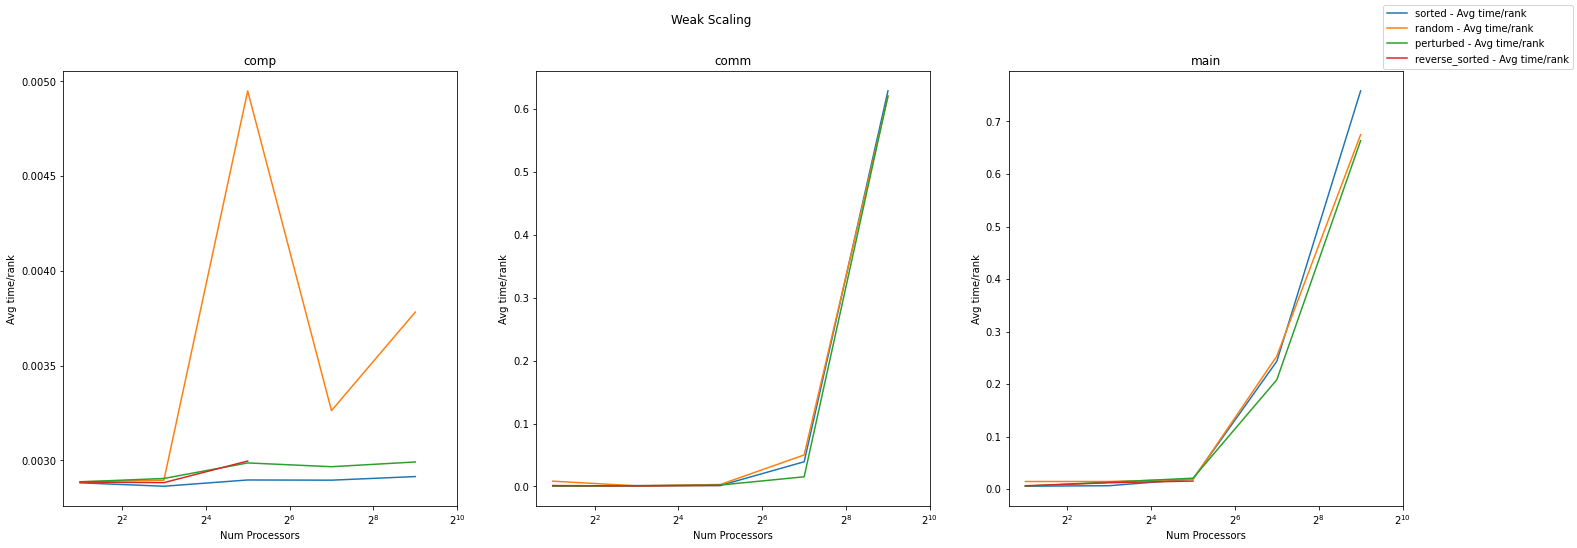

In [109]:
import math

#print(node.frame["name"])

    
fig, ax = plt.subplots(1,3,)
fig.set_figheight(8)
fig.set_figwidth(24)

for node in tk.graph.traverse():
    if(node.frame["name"] not in ["main","comp","comm"]):
        continue
    ind = ["comp","comm","main"].index(node.frame["name"])
    
    for in_type in input_types:
        values = []
        _processes = [2,8,32,128,512]
        sizes = [2**x for x in input_sizes[:5]]

        df = tk.dataframe.loc[node,['Avg time/rank']]
        for i in range(5):
            if((sizes[i],in_type,_processes[i]) not in df.index):
                print(f"Skipping: {(math.log2(sizes[i]),in_type,_processes[i])}")
                continue
            #print(df.loc[sizes[i],in_type,_processes[i]])
            values += df.loc[sizes[i],in_type,_processes[i]].values.tolist()
        print(f"adding to plot: {(_processes,values)}")

        ax[ind].plot(_processes[:len(values)],values,label=in_type)
        ax[ind].set_xscale('log',base = 2)
        ax[ind].set_title(node.frame["name"])
        ax[ind].set_ylabel('Avg time/rank')
        ax[ind].set_xlabel('Num Processors')
        ax[ind].set_xlim([0,1024])



fig.legend([input_types[0] + " - Avg time/rank",
            input_types[1] + " - Avg time/rank",
            input_types[2] + " - Avg time/rank",
            input_types[3] + " - Avg time/rank"])
fig.suptitle(f'Weak Scaling')
fig.savefig("graphs/weak_scaling.png")
plt.show()

                                 Avg time/rank
input_size input_type num_procs               
65536      perturbed  2               0.002887
                      4               0.001465
                      8               0.000742
                      16              0.000400
                      32              0.000352
                      64              0.000131
                      128             0.000090
                      256             0.000077
                      512             0.000066
                      1024            0.000085
           random     2               0.002888
                      4               0.001481
                      8               0.000742
                      16              0.000433
                      32              0.000286
                      64              0.000205
                      128             0.000168
                      256             0.000125
                      512             0.000088
             

KeyError: 'sorted'

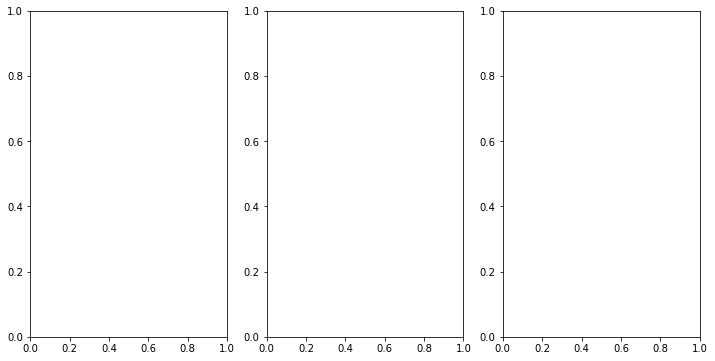

In [69]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))

plot_weak_scaling(tk, ax1, "comp")

plot_weak_scaling(tk, ax2, "comm")

plot_weak_scaling(tk, ax3, "main")

plt.tight_layout()
plt.show()